In [ ]:


import numpy as np
import pandas as pd



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Set the search parameters
filename = 'insurance.xlsx'
search_path = '/content/drive/MyDrive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break


In [ ]:
import pandas as pd

# Load the XLSX file into a DataFrame
medical_df = pd.read_excel(file_path)


In [ ]:
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.550
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.834
1336,21,female,25.800,0,no,southwest,2007.945


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422346
std,14.049960,6.098187,1.205493,12110.011277
min,18.000000,15.960000,0.000000,1121.874000
25%,27.000000,26.296250,0.000000,4740.287000
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:


import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:


fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()



In [ ]:


fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()



In [ ]:


fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()



In [ ]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'

)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:


fig = px.histogram(medical_df,
                  x = "charges",
                  marginal = 'box',
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()



In [ ]:


medical_df.smoker.value_counts()



no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:


px.histogram(medical_df, x='smoker', color='sex', title='Smoker')



In [ ]:


fig = px.histogram(medical_df,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()



In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:


fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()



In [ ]:


px.violin(medical_df,x = 'children',y = 'charges')



<Axes: xlabel='sex', ylabel='charges'>

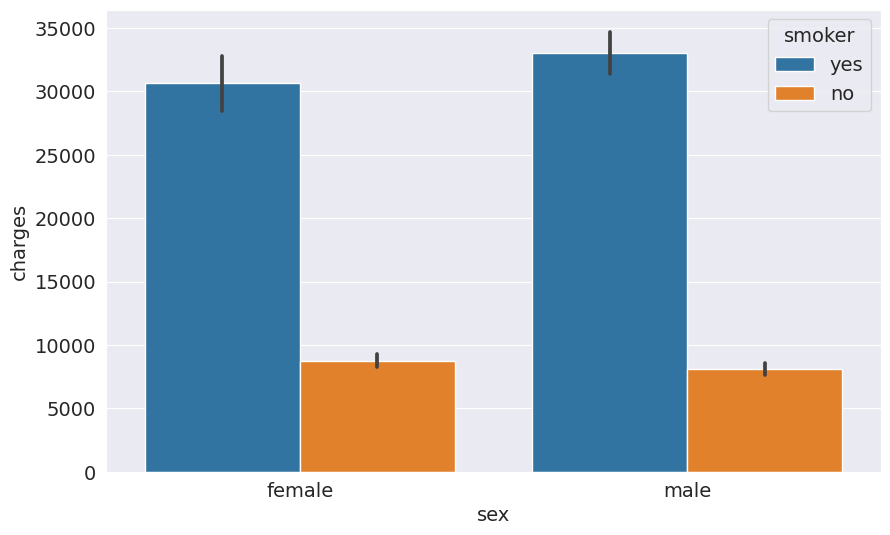

In [ ]:
sns.barplot(data = medical_df,x = 'sex',y = 'charges',hue = "smoker")

In [ ]:
px.histogram(medical_df,x='sex',y = 'charges',color = 'region')


In [ ]:
medical_df.charges.corr(medical_df.age)


0.29900819230161985

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834097610728912

In [ ]:
medical_df.children.corr(medical_df.charges)


0.06799822393405405

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)


0.7872514302950616

In [ ]:
medical_df.corr()

<ipython-input-29-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-30-ead211be94a0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



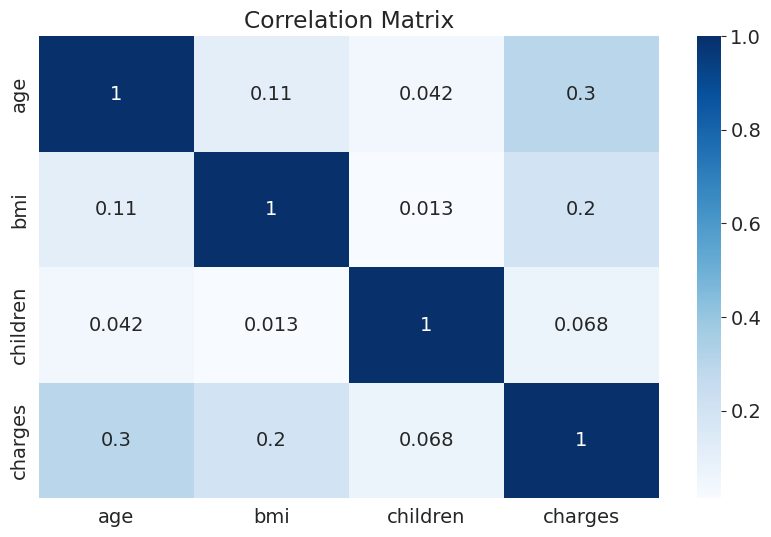

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

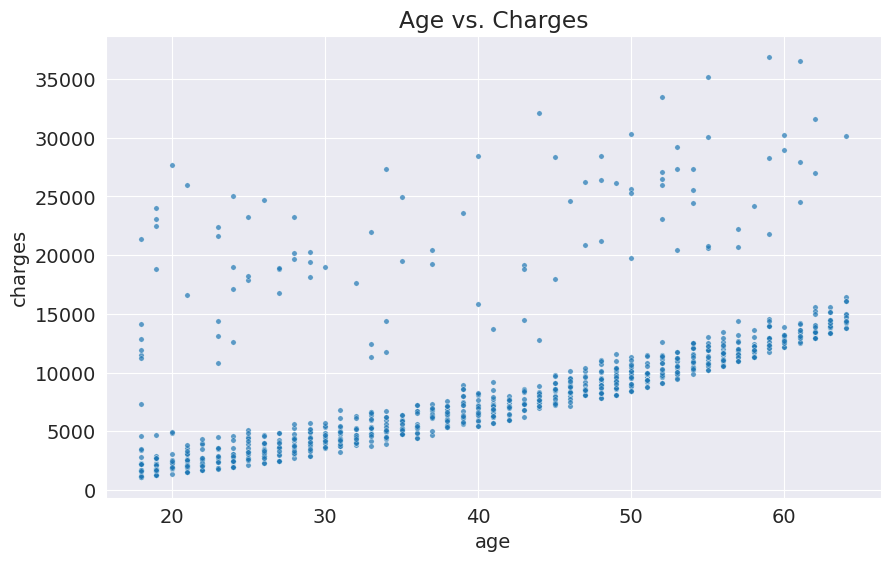

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
w = 50
b = 100


In [ ]:
estimate_charges(30,w,b)

1600

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
non_smoker_df.charges

1        1725.552
2        4449.462
3       21984.470
4        3866.855
5        3756.622
          ...    
1332    11411.690
1333    10600.550
1334     2205.981
1335     1629.834
1336     2007.945
Name: charges, Length: 1064, dtype: float64

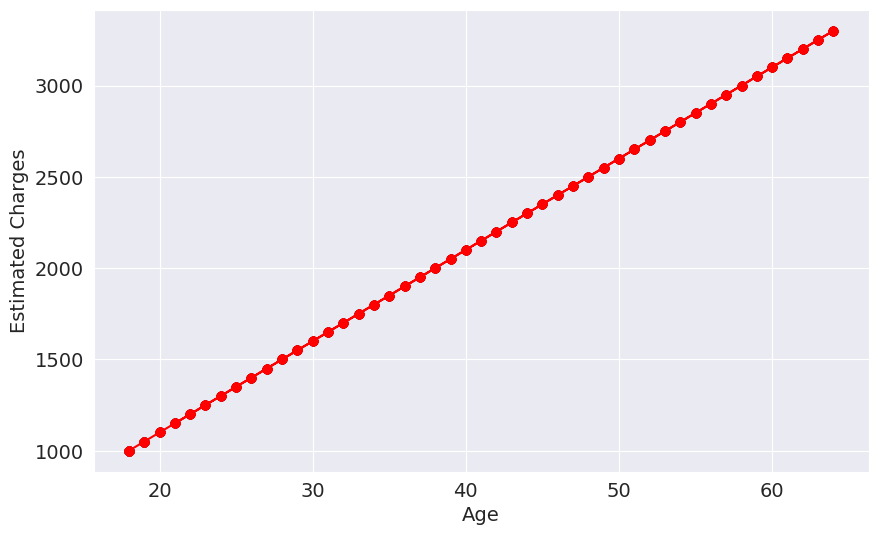

In [ ]:
plt.scatter(ages, estimated_charges);
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges');


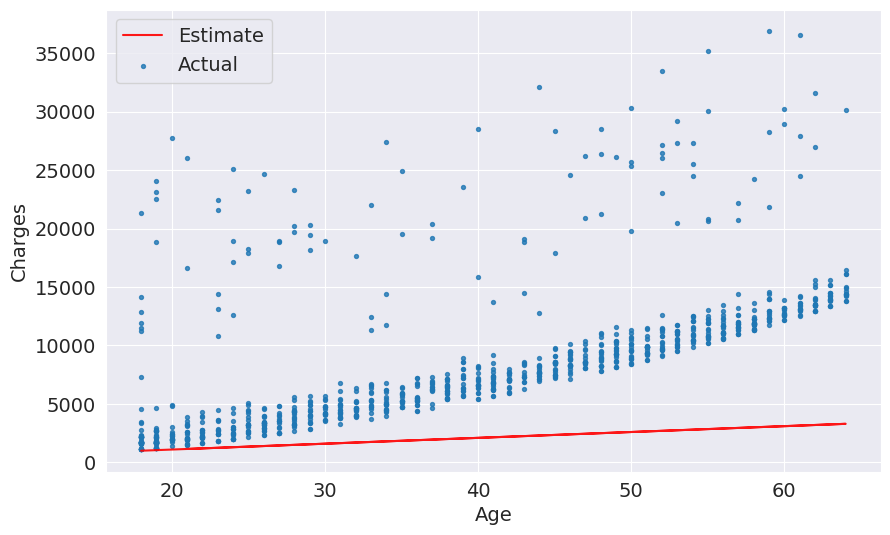

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

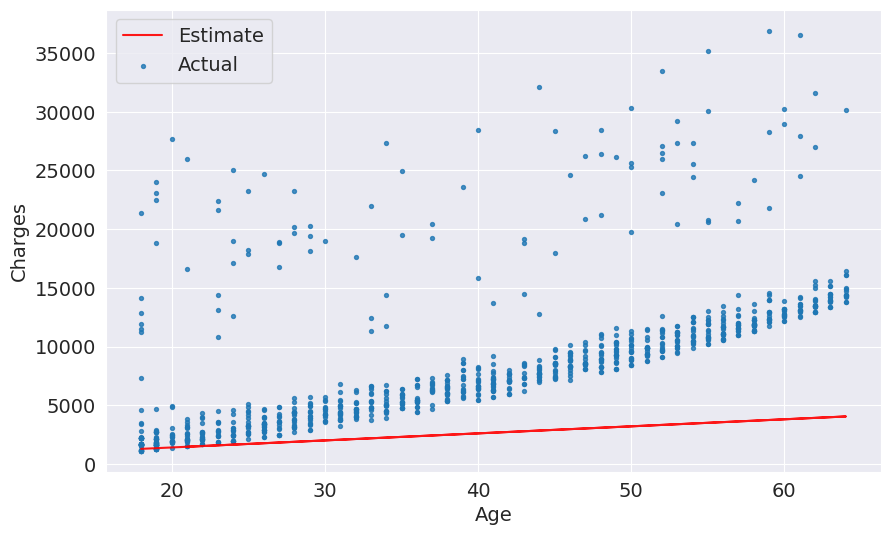

In [ ]:
try_parameters(60, 200)


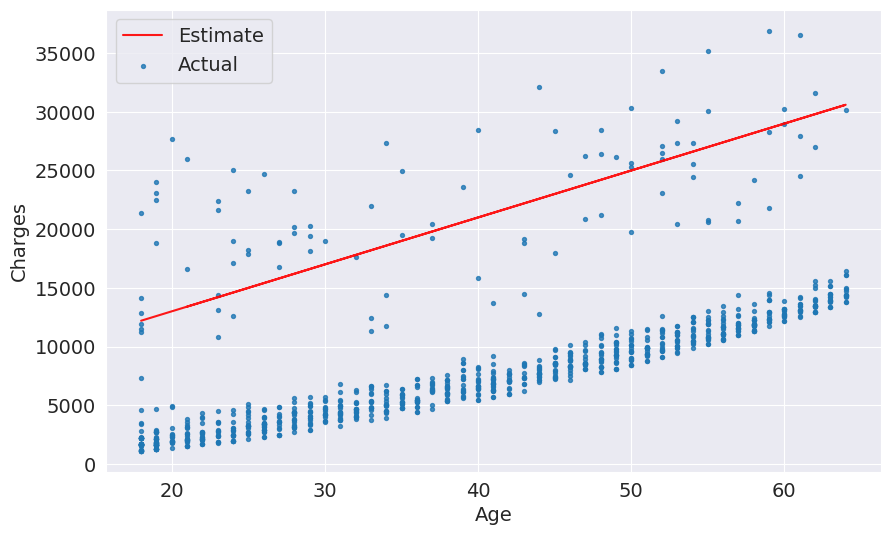

In [ ]:
try_parameters(400, 5000)


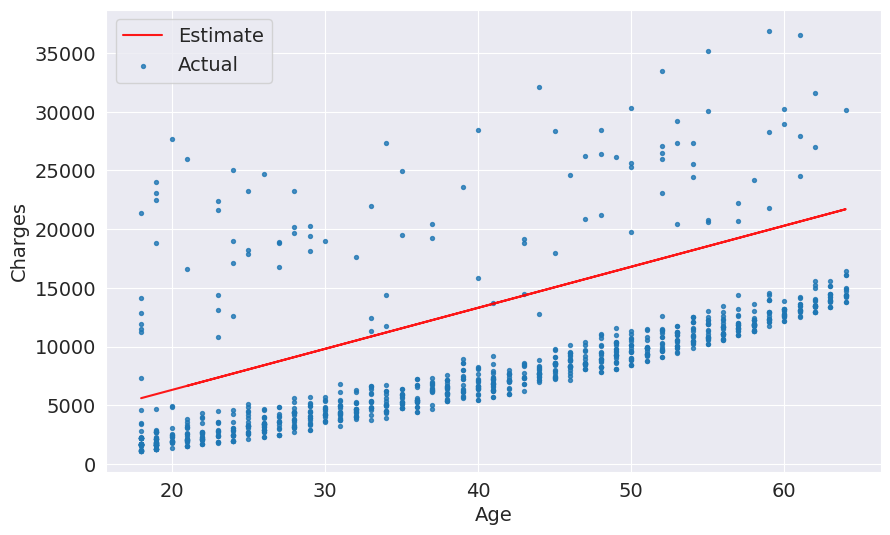

In [ ]:
try_parameters(350,-700)


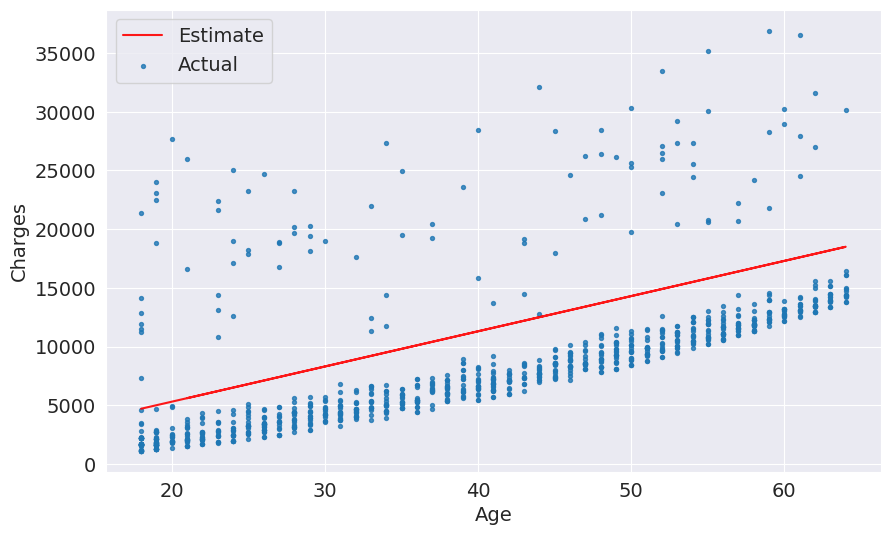

In [ ]:
try_parameters(300,-700)


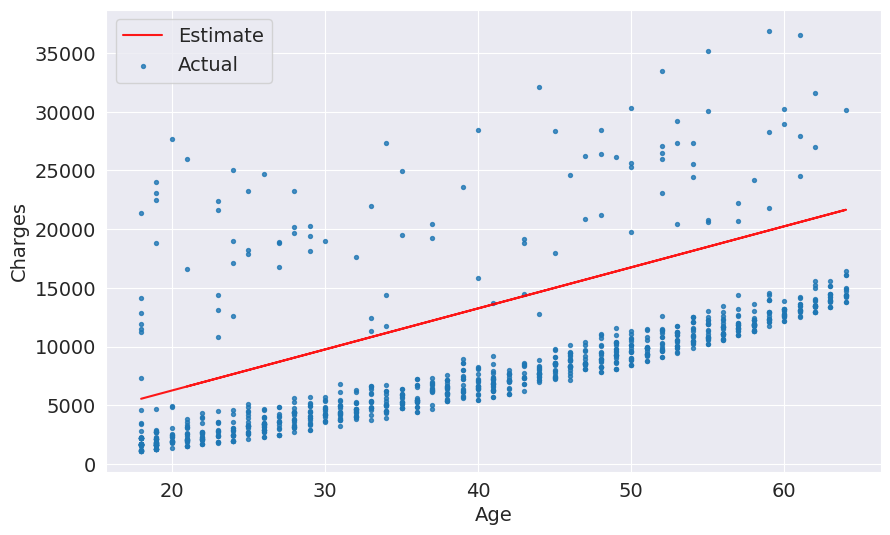

In [ ]:
try_parameters(350,-750)


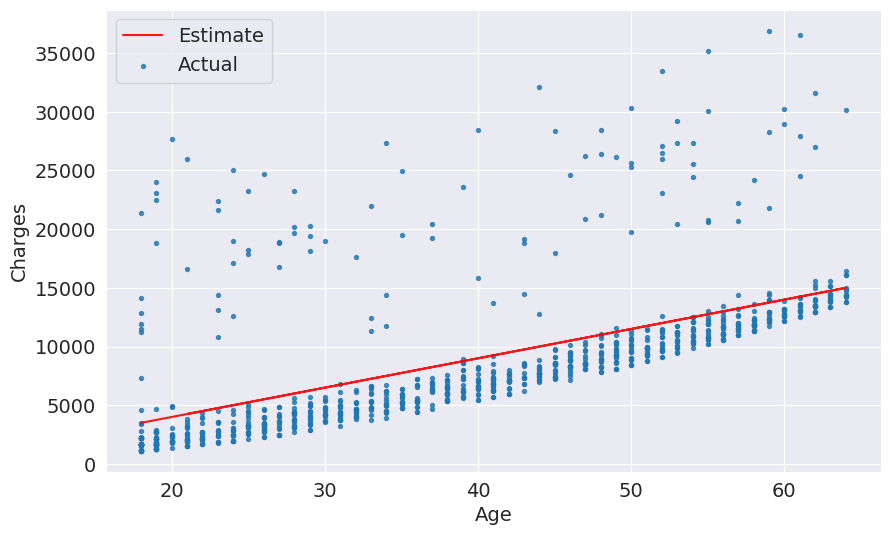

In [ ]:
try_parameters(250,-1000)


In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

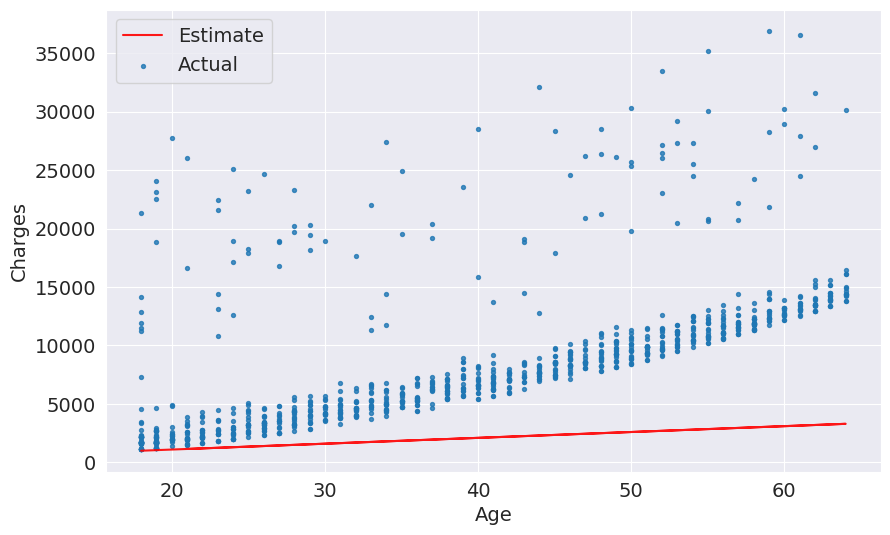

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949580803304

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949580803304


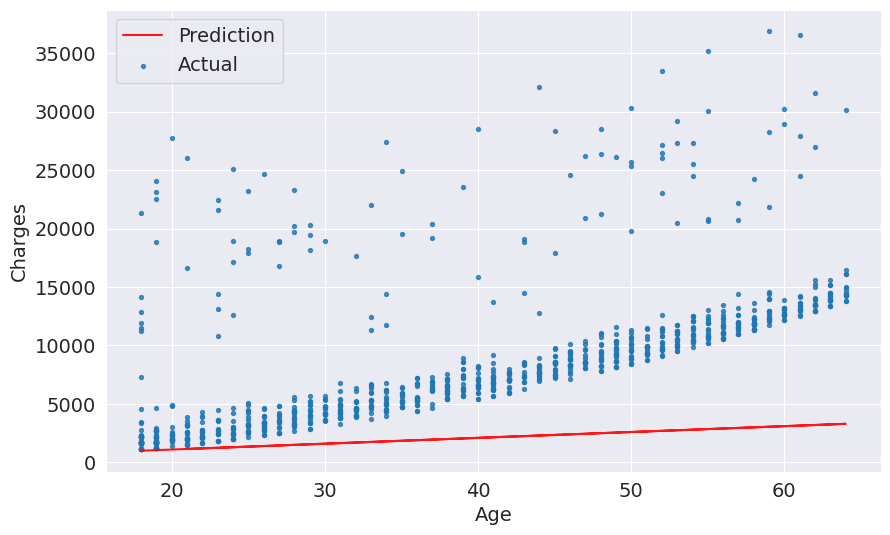

In [ ]:
try_parameters(50, 100)

RMSE Loss:  4686.972801829269


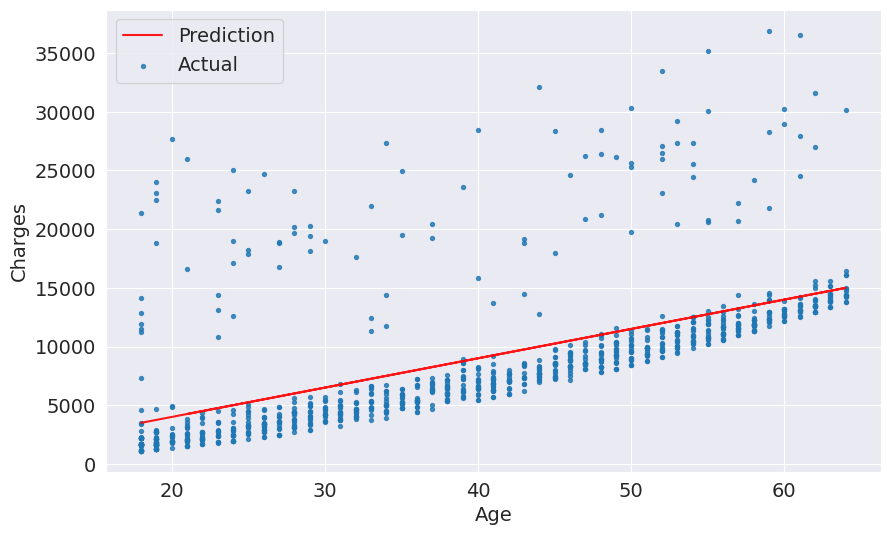

In [ ]:
try_parameters(250,-1000)

RMSE Loss:  4673.6375079791505


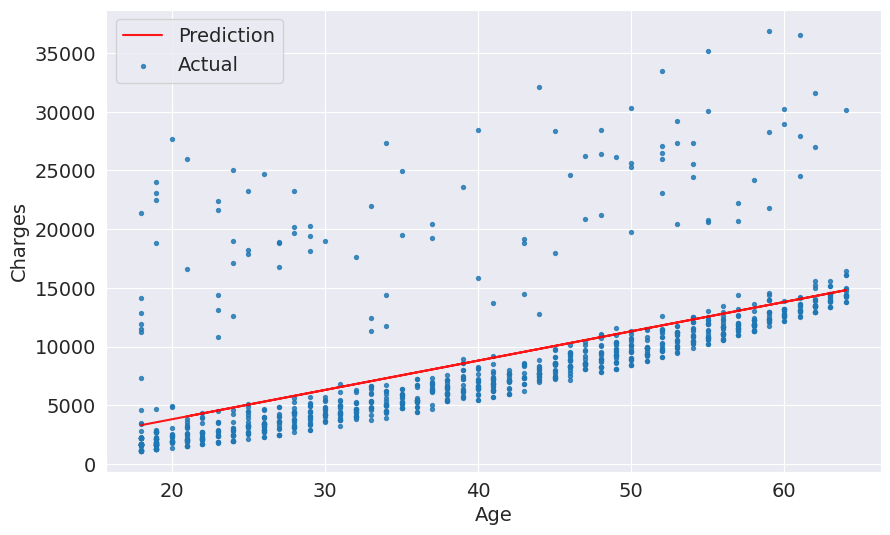

In [ ]:
try_parameters(250,-1200)

RMSE Loss:  4664.425938333686


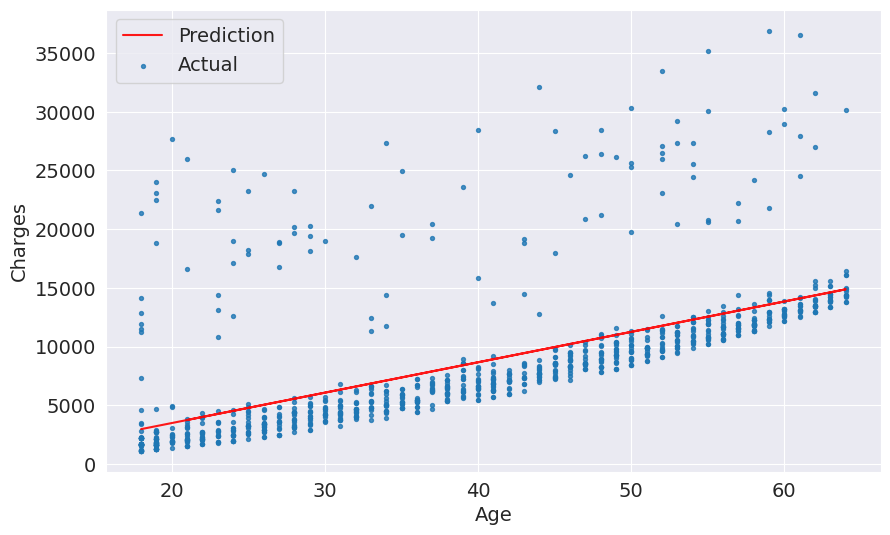

In [ ]:
try_parameters(259,-1700)

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [ ]:
model = LinearRegression()

In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.05983475, 5391.5490124 , 6727.79360122, ..., 2719.05983475,
       2719.05983475, 3520.80658804])

In [ ]:
rmse(targets, predictions)

4662.505664245444

In [ ]:
# w
model.coef_

array([267.24891777])

In [ ]:
# b
model.intercept_

-2091.420685028492

In [ ]:
model1 = SGDRegressor()

In [ ]:
model1.fit(inputs,targets)

SGDRegressor()

In [ ]:
predictions = model1.predict(inputs)
rmse(targets, predictions)

5098.1091921396965

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
11,62,female,26.290,0,yes,southeast,27808.73
14,27,male,42.130,0,yes,southeast,39611.76
19,30,male,35.300,0,yes,southwest,36837.47
23,34,female,31.920,1,yes,northeast,37701.88
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.58
1314,30,female,23.655,3,yes,northwest,18765.88
1321,62,male,26.695,0,yes,northeast,28101.33
1323,42,female,40.370,2,yes,southeast,43896.38


In [ ]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (274, 1)
 (274,)


In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
predicted = model.predict(inputs)
print('RMSE:',)
rmse(targets,predicted)

RMSE:


10711.003629950033

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505664245444


In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312732950239


In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654716598646

In [ ]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()


In [ ]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [ ]:
inputs,targets = non_smoker_df[['bmi']],non_smoker_df['charges']

In [ ]:
model = LinearRegression().fit(inputs, targets)

In [ ]:
predictions=model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)


Loss: 5969.772493928843


In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892869335266475

In [ ]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470312761761


In [ ]:
inputs,targets = smoker_df[['age','children','bmi']],smoker_df['charges']

In [ ]:
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)

In [ ]:
loss = rmse(targets,prediction)
print('Loss',loss)

Loss 5718.2023824694215


In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317929387844


In [ ]:
px.scatter(medical_df,x="age",y="charges",color='smoker')

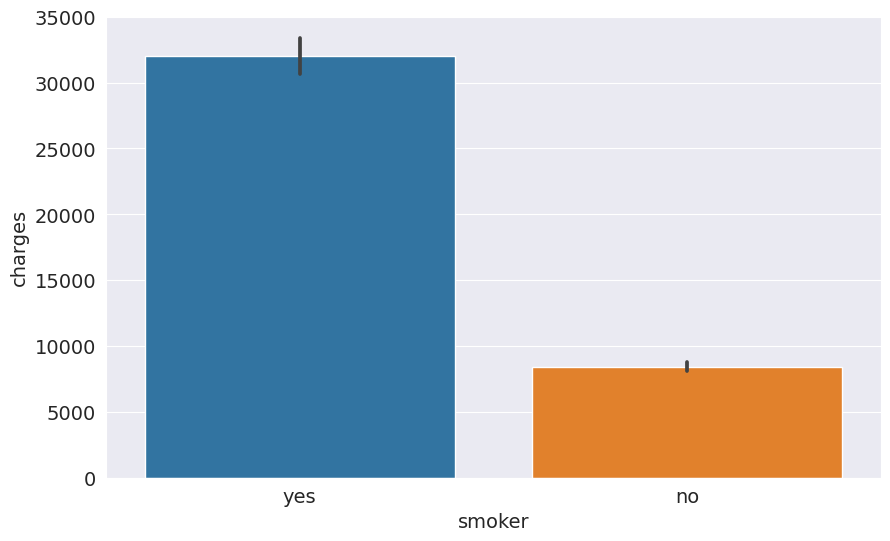

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514302950616

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.920,1
1,18,male,33.770,1,no,southeast,1725.552,0
2,28,male,33.000,3,no,southeast,4449.462,0
3,33,male,22.705,0,no,northwest,21984.470,0
4,32,male,28.880,0,no,northwest,3866.855,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.550,0
1334,18,female,31.920,0,no,northeast,2205.981,0
1335,18,female,36.850,0,no,southeast,1629.834,0
1336,21,female,25.800,0,no,southwest,2007.945,0


In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439223732449


<Axes: xlabel='sex', ylabel='charges'>

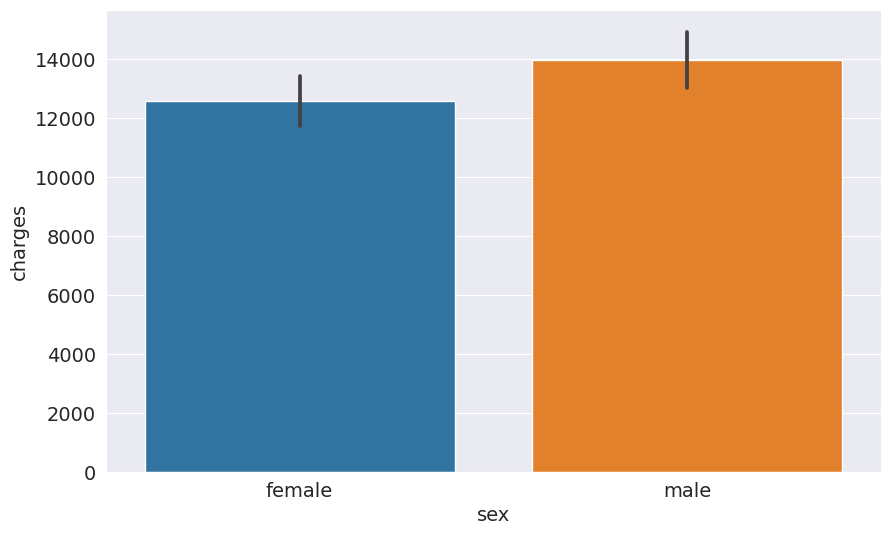

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [ ]:
sex_codes = {'female': 0, 'male': 1}

In [ ]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.920,1,0
1,18,male,33.770,1,no,southeast,1725.552,0,1
2,28,male,33.000,3,no,southeast,4449.462,0,1
3,33,male,22.705,0,no,northwest,21984.470,0,1
4,32,male,28.880,0,no,northwest,3866.855,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.550,0,1
1334,18,female,31.920,0,no,northeast,2205.981,0,0
1335,18,female,36.850,0,no,southeast,1629.834,0,0
1336,21,female,25.800,0,no,southwest,2007.945,0,0


In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206931616931

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100716171191


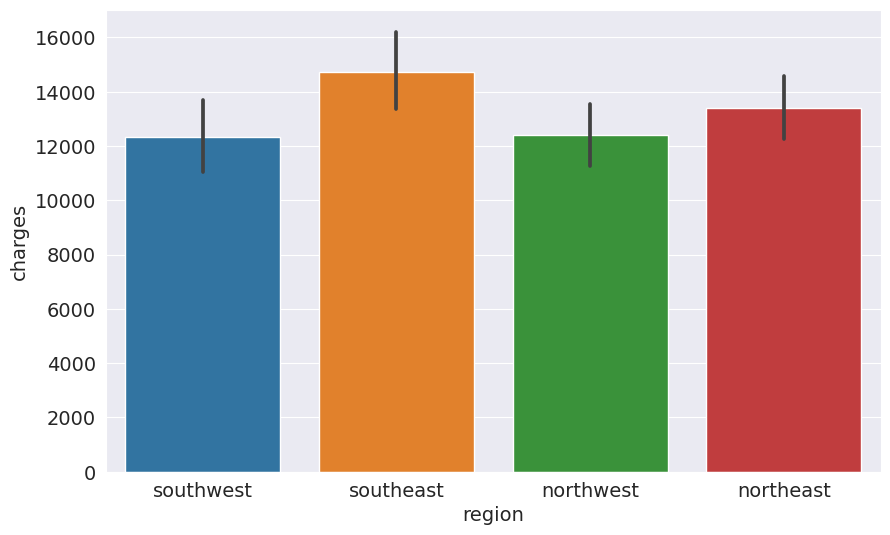

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.920,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.552,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.462,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.470,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.855,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.550,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.981,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.834,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.945,0,0,0.0,0.0,0.0,1.0


In [ ]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796631018615


In [ ]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes)

#one-hot coding for smoker_df
enc.fit(smoker_df[['region']])
one_hot = enc.transform(smoker_df[['region']]).toarray()
one_hot
smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model_smoker = LinearRegression().fit(inputs, targets)

# Generate predictions
prediction = model_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, prediction)
print('Loss:', loss)

Loss: 5668.467800223667


<ipython-input-110-16835a68bb73>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-16835a68bb73>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-16835a68bb73>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-168

In [ ]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes)

#one-hot coding for smoker_df
enc.fit(non_smoker_df[['region']])
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
one_hot
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model_non_smoker= LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model_non_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074901111636


<ipython-input-111-ffa3afbc19fe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-ffa3afbc19fe>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-ffa3afbc19fe>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-ffa

In [ ]:
model.coef_

array([  256.85635215,   339.19346633,   475.50051713, 23848.53459425,
        -131.31419388,   587.00923405,   234.04515127,  -448.01277023,
        -373.04161509])

In [ ]:
model.intercept_

-12525.548169889818

In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_ , model.intercept_)
})
weights_df

,feature,weight
0,age,256.856352
1,bmi,339.193466
2,children,475.500517
3,smoker_code,23848.534594
4,sex_code,-131.314194
5,northeast,587.009234
6,northwest,234.045151
7,southeast,-448.012770
8,southwest,-373.041615
9,1,-12525.548170


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.920,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.552,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.462,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.470,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.855,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.550,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.981,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.834,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.945,0,0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs


array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796631018615


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534594
9,1,8466.483201
0,age,3607.472731
1,bmi,2067.692043
5,northeast,587.009234
2,children,572.998176
6,northwest,234.045151
4,sex_code,-131.314194
8,southwest,-373.041615
7,southeast,-448.012770


In [ ]:
from types import new_class
new_customers = [[21,19,1,0,0,0,1,0,0.]]
scaler.transform([[21,19,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-1.29636188, -1.91331587, -0.07876719]])

In [ ]:
model.predict([[-1.29636188, -1.91331587, -0.07876719,0,0,0,1,0,0.]])

array([22.65676366])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2,random_state=0)

In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5641.626540647828


In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6140.157438022663


In [ ]:
new_customers = [list(map(float,input().split(",")))]
a=new_customers
# print([[new_customers[0][0],new_customers[0][1],new_customers[0][2]]])
ans=scaler.transform([[new_customers[0][0],new_customers[0][1],new_customers[0][2]]])
for i in range (3):
  a[0][i]=ans[0][i]
# print(a)




21,25,0,1,0,0,0,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
model.predict(a)

array([24590.44571855])